In [4]:
import gdown
import os
import numpy as np
import pandas as pd
import cv2
# import patoolib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from tensorflow import keras
from tensorflow.keras.applications import ResNet101,ResNet50,ResNet152
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model, save_model
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings("ignore")

## 1.Loading Data

In [5]:
url = 'https://drive.google.com/u/0/uc?id=1-7ljOXuzdIeXTCRuxZFGH2Sg3IanH-WJ&export=download'
gdown.download(url,quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1-7ljOXuzdIeXTCRuxZFGH2Sg3IanH-WJ&export=download
To: /content/train_data.zip
100%|██████████| 173M/173M [00:01<00:00, 115MB/s]


'train_data.zip'

In [ ]:
url_test='https://drive.google.com/u/0/uc?id=1-5xCKnZ7N7X6m0pBV1yZDoTmJjAQpttF&export=download'
gdown.download(url_test,quiet=False)

Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1-5xCKnZ7N7X6m0pBV1yZDoTmJjAQpttF&export=download
From (redirected): https://drive.google.com/uc?id=1-5xCKnZ7N7X6m0pBV1yZDoTmJjAQpttF&export=download&confirm=t&uuid=5a41d4bb-8b6e-42e3-80a2-03b99349544b
To: /jupyter/test_data.zip
100%|██████████| 73.0M/73.0M [00:12<00:00, 5.97MB/s]


'test_data.zip'

In [ ]:

patoolib.extract_archive("train_data.zip",outdir="train")

patool: Extracting train_data.zip ...
patool: ... train_data.zip extracted to `train'.


'train'

In [ ]:

patoolib.extract_archive("test_data.zip",outdir="test")

patool: Extracting test_data.zip ...
patool: ... test_data.zip extracted to `test'.


'test'

## 2.Display some data

Label:1


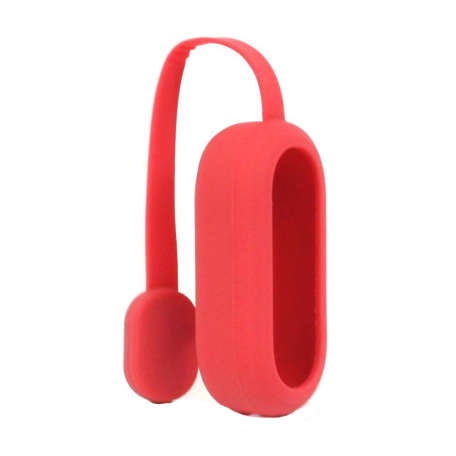

Label:2


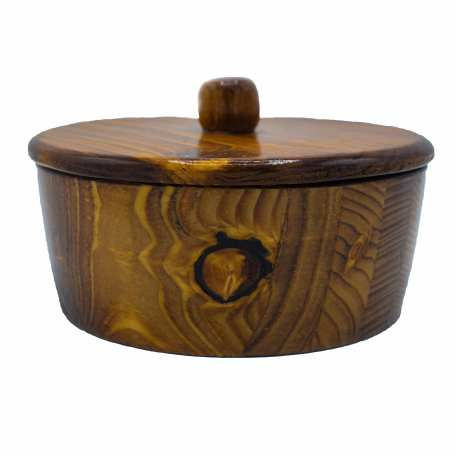

Label:3


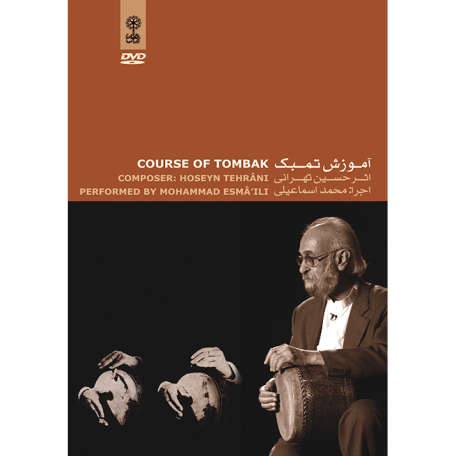

Label:4


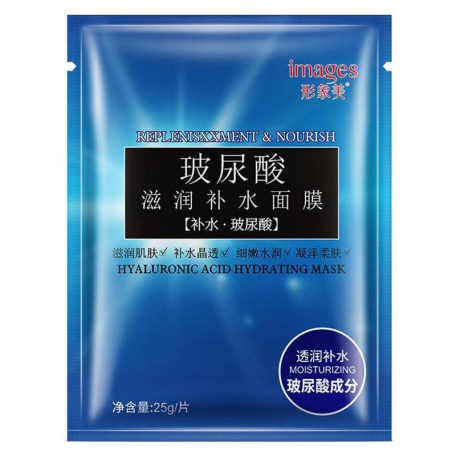

Label:5


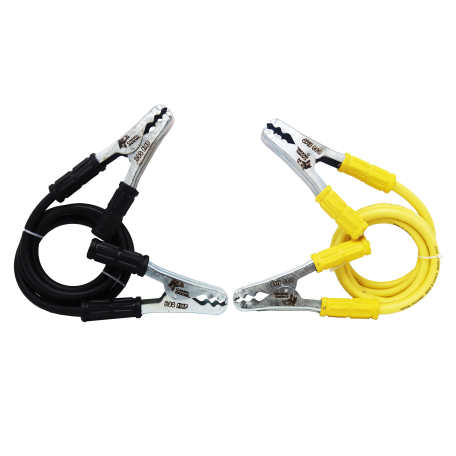

Label:6


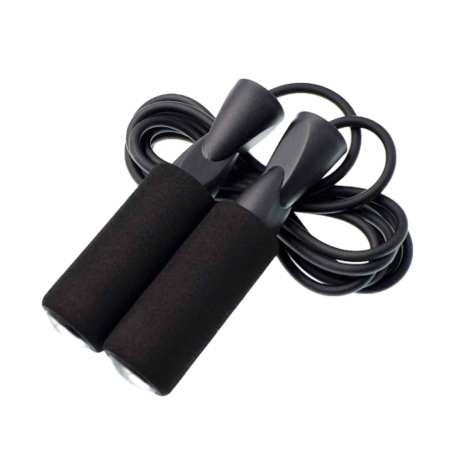

Label:7


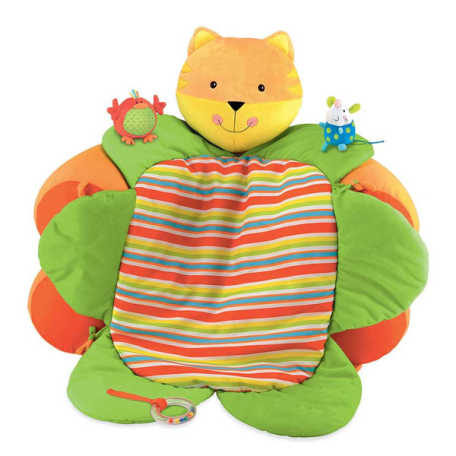

Label:8


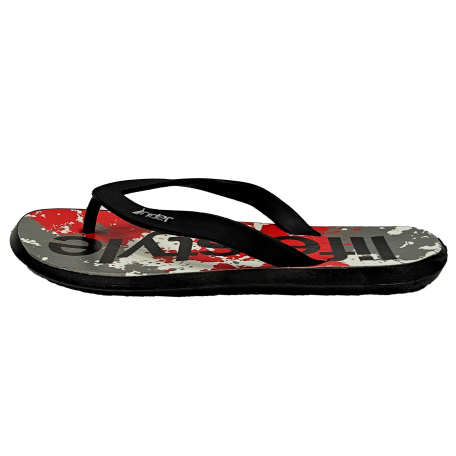

Label:9


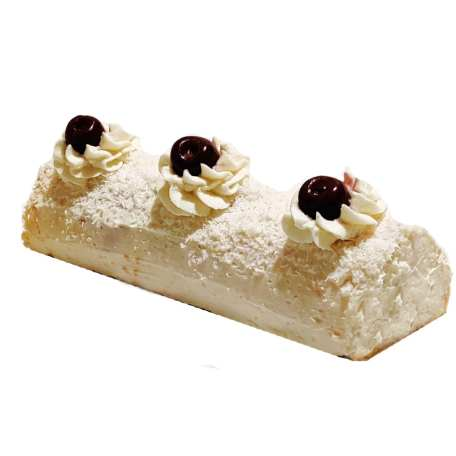

In [7]:


dataset_folder = "/content/train_data"

# Specify the number of categories
num_categories = 10

for category in range(1,num_categories):
    category_folder = os.path.join(dataset_folder, f"{category}")

    # Get the list of image files in the category folder
    image_files = [f for f in os.listdir(category_folder) if f.endswith(".jpg")]

    if len(image_files) > 0:
       
        first_image_path = os.path.join(category_folder, image_files[0])

        
        image = cv2.imread(first_image_path)

        # Display the label and show the image
        print(f"Label:{category}")
        cv2_imshow(image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

## 3.Preprocessing Data

In [ ]:
train_data_dir = "train/train_data"
# test_data_dir="/content/drive/MyDrive/quera_3_test"
# Define image dimensions
image_height, image_width = 224, 224
# image_height, image_width = 299,299


# Define the number of classes (labels)
num_classes = 10

# Define batch size
batch_size = 64

#Create an instance of ImageDataGenerator with preprocessing for ResNet50

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Use ResNet50's preprocessing
    validation_split=0.2

)



# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 7994 images belonging to 10 classes.
Found 1996 images belonging to 10 classes.


## 4.Model

In [ ]:
base_model = ResNet152(weights='imagenet',input_shape=(image_height, image_width, 3),include_top=False)


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.02)))

for layer in base_model.layers[:-1]:
    layer.trainable = False

# Compile the model

optimizer = tf.keras.optimizers.SGD(learning_rate=alpha)

model.compile(optimizer =optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy',patience=5, verbose=1,restore_best_weights=True,min_delta=0.001)
reduce_lr = tf._keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,patience=3, min_lr=0.00001)
# Train the model 
model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint,reduce_lr],
    shuffle=False
)

Epoch 1/100


2023-11-12 14:11:48.259399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-12 14:11:48.773281: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 14:11:48.905923: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


  1/125 [..............................] - ETA: 16:23 - loss: 6.3077 - accuracy: 0.1250

2023-11-12 14:11:49.504839: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4ef9af7900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-12 14:11:49.504865: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-11-12 14:11:49.516604: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 14:11:49.567542: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 [==============================] - ETA: 0s - loss: 4.6228 - accuracy: 0.2478
Epoch 1: val_accuracy improved from inf to 0.43086, saving model to best_model.h5
125/125 [==============================] - 34s 209ms/step - loss: 4.6228 - accuracy: 0.2478 - val_loss: 2.7240 - val_accuracy: 0.4309 - lr: 1.0000e-04
Epoch 2/100
125/125 [==============================] - ETA: 0s - loss: 3.5335 - accuracy: 0.3910
Epoch 2: val_accuracy did not improve from 0.43086
125/125 [==============================] - 22s 177ms/step - loss: 3.5335 - accuracy: 0.3910 - val_loss: 2.5062 - val_accuracy: 0.4920 - lr: 1.0000e-04
Epoch 3/100
125/125 [==============================] - ETA: 0s - loss: 3.1093 - accuracy: 0.4403
Epoch 3: val_accuracy did not improve from 0.43086
125/125 [==============================] - 22s 175ms/step - loss: 3.1093 - accuracy: 0.4403 - val_loss: 2.3900 - val_accuracy: 0.5155 - lr: 1.0000e-04
Epoch 4/100
125/125 [==============================] - ETA: 0s - loss: 2.8380 - accu

In [ ]:
model.save('model_60_ws_152.h5')

In [ ]:
model = tf.keras.models.load_model('model_60_ws_152.h5')

# Visualize a summary of the model architecture
model.summary()



2023-11-12 16:23:46.607123: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8064 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:09:00.0, compute capability: 8.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 10)                1003530   
                                                                 
Total params: 59374474 (226.50 MB)
Trainable params: 1003530 (3.83 MB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________


## 5.Making Predictions

In [ ]:
test_data_dir = 'test'

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Disable shuffling for test data
)


Found 4000 images belonging to 1 classes.


In [ ]:


test_filenames_tests = [os.path.basename(file) for file in test_generator.filenames]

# Make predictions using the trained model
predictions_tests= model.predict(test_generator, verbose=1)

# Convert predicted probabilities to class labels
predicted_labels_tests = np.argmax(predictions_test, axis=1)

# Create a DataFrame with filenames and predicted labels
result_df_tests= pd.DataFrame({'name': test_filenames_tests, 'predicted': predicted_labels_tests})

# Save predictions to a CSV file
result_df_tests.to_csv('q1_submission.csv', index=False)

63/63 [==============================] - 8s 133ms/step


In [ ]:
pd.read_csv("q1_submission.csv")

,name,predicted
0,0009e12a0edb16b231b73e501366209662a51363_16140...,7
1,00180e2358a45e3028e993b43e483eeee105e127_16284...,4
2,0037909953100cdd2c03a30084fa3876e5579212_16151...,3
3,006321aee302c253b9b4922138f879508d48f77e_16241...,0
4,0067178f7669828b3439d0888795b1f3225a7df2_16289...,0
...,...,...
3995,ffac0874d22903dadba619aea38393f77ce6cac6_16277...,6
3996,ffbe06e96778ca2a0a3f5c56961304bc2d6ddb49_16258...,4
3997,ffc3f6f05c6da8c4970334083f03d453f5cddfbb_16242...,7
3998,ffe163763cbd2674e940dcf77af1863174c59dc5_16304...,8


## 6.Visualization

1/1 [==============================] - 0s 35ms/step


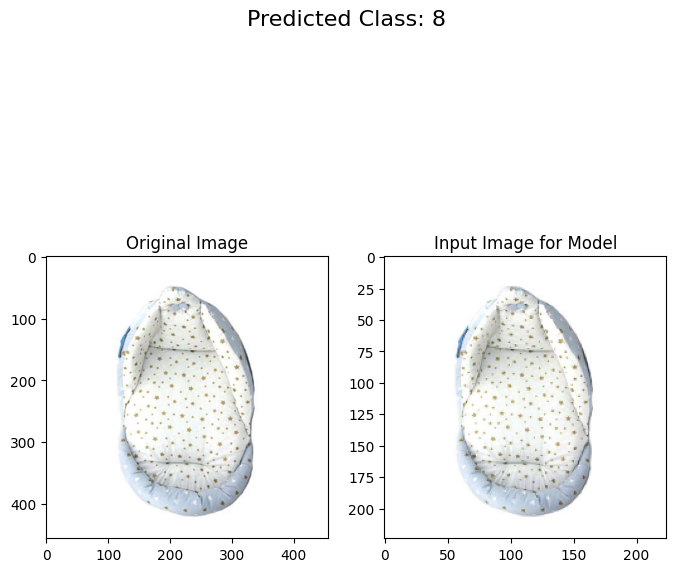

In [ ]:
image_path = 'test/test_data/0009e12a0edb16b231b73e501366209662a51363_1614099213.jpg' 
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Resize the image to the input size expected by the model
input_size = (224, 224)  
resized_image = cv2.resize(image, input_size)
input_image = np.expand_dims(resized_image, axis=0)
predictions = model.predict(input_image)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Display the original image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Display the resized input image
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Input Image for Model')


plt.suptitle(f'Predicted Class: {predicted_class}', fontsize=16)
plt.show()